In [1]:
#import
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
df=pd.read_csv('Hybrid_ESP.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cate_name          68 non-null     object 
 1   Cate_HOMO          68 non-null     float64
 2   Cate_LUMO          68 non-null     float64
 3   Cate_ESP_O1        68 non-null     float64
 4   Cate_ESP_H1        68 non-null     float64
 5   Cate_ESP_O2        68 non-null     float64
 6   Cate_ESP_H2        68 non-null     float64
 7   Cate_BL_ArO1       68 non-null     float64
 8   Cate_BL_O1H1       68 non-null     float64
 9   Cate_BL_ArO2       68 non-null     float64
 10  Cate_BL_O2H2       68 non-null     float64
 11  Cate_total_dipole  68 non-null     float64
 12  P_name             68 non-null     object 
 13  P_HOMO             68 non-null     float64
 14  P_LUMO             68 non-null     float64
 15  P_ESP_P            68 non-null     float64
 16  P_ESP_=O           68 non-nu

In [3]:
#Building descriptors
X = df.drop(columns=['Yield', 'Cate_name', 'P_name' ])
print('---Descriptors---')
print(X.head())

y = pd.DataFrame(df['Yield'],columns=['Yield'])
print('---Objective---')
print(y.head())

---Descriptors---
   Cate_HOMO  Cate_LUMO  Cate_ESP_O1  Cate_ESP_H1  Cate_ESP_O2  Cate_ESP_H2  \
0      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
1      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
2      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
3      -5.63       0.21    -0.555170     0.441278    -0.594799     0.444770   
4      -5.51       0.22    -0.542028     0.433177    -0.582447     0.440296   

   Cate_BL_ArO1  Cate_BL_O1H1  Cate_BL_ArO2  Cate_BL_O2H2  ...  rdkit_catePC1  \
0         1.363         0.969         1.378         0.965  ...      -5.580019   
1         1.363         0.969         1.378         0.965  ...      -5.580019   
2         1.363         0.969         1.378         0.965  ...      -5.580019   
3         1.363         0.969         1.378         0.965  ...      -5.580019   
4         1.364         0.969         1.379         0.965  ...      -2.835492   

   rdkit_catePC2  rd

In [4]:
X.info()
print(X.isnull().any())
print(X.isnull().values.sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cate_HOMO          68 non-null     float64
 1   Cate_LUMO          68 non-null     float64
 2   Cate_ESP_O1        68 non-null     float64
 3   Cate_ESP_H1        68 non-null     float64
 4   Cate_ESP_O2        68 non-null     float64
 5   Cate_ESP_H2        68 non-null     float64
 6   Cate_BL_ArO1       68 non-null     float64
 7   Cate_BL_O1H1       68 non-null     float64
 8   Cate_BL_ArO2       68 non-null     float64
 9   Cate_BL_O2H2       68 non-null     float64
 10  Cate_total_dipole  68 non-null     float64
 11  P_HOMO             68 non-null     float64
 12  P_LUMO             68 non-null     float64
 13  P_ESP_P            68 non-null     float64
 14  P_ESP_=O           68 non-null     float64
 15  P_ESP_H            68 non-null     float64
 16  P_BL_P=O           68 non-nu

In [14]:
#storage 
data_r2_train =[]
data_RMSE_train = []
data_MAE_train = []
data_r2_test = []
data_RMSE_test = []
data_MAE_test = []
cum_coef = np.zeros((1,X.shape[1]))

#Lasso
for i in range(10):
    seed=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
    a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
    n_lambda = 1000
    alphas = np.logspace(-6, 0, n_lambda)
    model = LassoCV(cv=5, alphas=alphas)
    model.fit(a_X_train, y_train['Yield'])
    
    cum_coef += model.coef_
    
    y_pred1 = model.predict(a_X_train)
    y_pred2 = model.predict(a_X_test)
    
    #train
    r2_train = metrics.r2_score(y_train, y_pred1)
    RMSE_train = metrics.mean_squared_error(y_train, y_pred1)
    MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
    #test
    r2_test = metrics.r2_score(y_test, y_pred2)
    RMSE_test = metrics.mean_squared_error(y_test, y_pred2)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred2)
    
    data_r2_train.append(r2_train)
    data_RMSE_train.append(RMSE_train)
    data_MAE_train.append(MAE_train)
    data_r2_test.append(r2_test)
    data_RMSE_test.append(RMSE_test)
    data_MAE_test.append(MAE_test)
    
    # standard regression coefficiency
    standard_regression_coefficients = pd.DataFrame(model.coef_)  
    standard_regression_coefficients.index = X_train.columns  
    standard_regression_coefficients.columns = ['standard_regression_coefficients']
    
    print('----------------------')
    print('seed:', seed)
    print('R2_train:', r2_train)
    print('R2_test:', r2_test)
    print('----------------------')
    print(standard_regression_coefficients)
print('R2_train_means:', sum(data_r2_train)/10)
print('R2_test_means:', sum(data_r2_test)/10)

----------------------
seed: 0
R2_train: 0.8735094424283201
R2_test: 0.7239792565643381
----------------------
                   standard_regression_coefficients
Cate_HOMO                                  0.000000
Cate_LUMO                                 -0.000000
Cate_ESP_O1                                0.419960
Cate_ESP_H1                               -1.538682
Cate_ESP_O2                               -0.000000
Cate_ESP_H2                                0.715616
Cate_BL_ArO1                               0.000000
Cate_BL_O1H1                              -0.000000
Cate_BL_ArO2                              -0.000000
Cate_BL_O2H2                              -0.000000
Cate_total_dipole                          0.000000
P_HOMO                                    -0.000000
P_LUMO                                     0.000000
P_ESP_P                                   -0.000000
P_ESP_=O                                   0.000000
P_ESP_H                                  -24.177258
P_BL_

In [6]:
data_r2_train_pd = pd.DataFrame(data= data_r2_train, columns=['r2_train'])
data_RMSE_train_pd = pd.DataFrame(data=data_RMSE_train, columns=['RMSE_train'])
data_MAE_train_pd = pd.DataFrame(data=data_MAE_train, columns=['MAE_train'])
data_r2_test_pd = pd.DataFrame(data=data_r2_test, columns=['r2_test'])
data_RMSE_test_pd = pd.DataFrame(data=data_RMSE_test, columns=['RMSE_test'])
data_MAE_test_pd = pd.DataFrame(data=data_MAE_test, columns=['MAE_test'])

data_all = pd.concat([data_r2_train_pd, data_RMSE_train_pd, data_MAE_train_pd, data_r2_test_pd, 
                      data_RMSE_test_pd, data_MAE_test_pd],
                     axis=1, join='inner')

data_all.loc['mean'] = data_all.mean()
print(data_all)

data_all.to_csv('../../score/Hybrid/Lasso_score.csv')

      r2_train  RMSE_train  MAE_train   r2_test   RMSE_test   MAE_test
0     0.873509   93.257153   5.872381  0.723979  361.021363  12.694545
1     0.822210  160.776781   8.666476  0.842760  152.341249   9.091193
2     0.851531  137.348583   8.025023  0.802120  191.361690   8.525421
3     0.849979  139.926238   7.758306  0.817878  174.790539   9.332076
4     0.855984  124.155885   7.374706  0.783698  229.999120   9.391247
5     0.843027  127.107427   6.873078  0.743382  312.099438  10.256922
6     0.869825  106.831486   6.496264  0.761290  287.277799  11.328765
7     0.863993  130.090572   7.564181  0.757014  220.268866  10.171483
8     0.848924  132.964496   6.813666  0.766656  230.599278   9.615995
9     0.828999  173.299817   9.151870  0.853846  102.988284   8.610302
mean  0.850798  132.575844   7.459595  0.785262  226.274762   9.901795


In [15]:
seed=9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
    
a_X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
a_X_test = (X_test - X_train.mean(axis=0)) / X_train.std(axis=0, ddof=1)
    
n_lambda = 1000
alphas = np.logspace(-6, 0, n_lambda)
model = LassoCV(cv=5, alphas=alphas)
model.fit(a_X_train, y_train['Yield'])
    
y_pred1 = model.predict(a_X_train)
y_pred2 = model.predict(a_X_test)

#train
r2_train = metrics.r2_score(y_train, y_pred1)
RMSE_train = metrics.mean_squared_error(y_train, y_pred1)
MAE_train =  metrics.mean_absolute_error(y_train, y_pred1)
    
#test
r2_test = metrics.r2_score(y_test, y_pred2)
RMSE_test = metrics.mean_squared_error(y_test, y_pred2)
MAE_test = metrics.mean_absolute_error(y_test, y_pred2)

print(r2_train)
print(r2_test)

0.8289989813919416
0.8538463440192331


In [17]:
# standard regression coefficiency
select = standard_regression_coefficients.abs()
select=select.sort_values('standard_regression_coefficients',ascending=False)
selection=[]
for a in select[0:7].index:
    selection.append(a)
chart=standard_regression_coefficients.loc[selection]
chart=chart.sort_values('standard_regression_coefficients',ascending=False)
chart

,standard_regression_coefficients
rdkit_catePC1,4.856830
rdkit_catePC4,0.780662
rdkit_catePC6,-0.309916
rdkit_P_PC1,-1.387942
rdkit_catePC2,-2.041573
Cate_ESP_H1,-4.171938
P_ESP_H,-25.517368


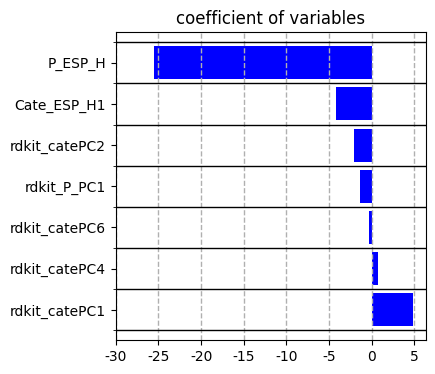

In [19]:
x_pos = np.arange(len(chart))

fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.barh(x_pos, chart['standard_regression_coefficients'], color='b')
ax1.set_title('coefficient of variables')
ax1.set_yticks(x_pos)
ax1.set_yticks(np.arange(-1,len(chart.index))+0.5, minor=True)
ax1.set_yticklabels(chart.index)
ax1.set_xticks(np.arange(-30,10,5))
ax1.set_xticklabels(np.arange(-30,10,5))
ax1.grid(which='minor',axis='y',color='black',linestyle='-', linewidth=1)
ax1.grid(which='major',axis='x',linestyle='--', linewidth=1)
plt.show()